In [84]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [86]:
#read csv data
df = pd.read_csv("creditcard.csv")

In [88]:
#basic info
df.head(5)
df.shape
df.describe()

(   Time        V1        V2        V3        V4        V5        V6        V7  \
 0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V21       V22       V23       V24       V25  \
 0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
 1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
 2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
 3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
 4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
 
         V26      

In [4]:
df.isnull().sum().max()

0

In [89]:
#display all the columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
#except for the transaction and amount we dont know what the other columns are due to privacy reasons.
#ALmost all the columns are scaled except for amount,class and Time.

In [90]:
#Checking for data balance
print("Percentage of data that are fraudulent " ,round(df[df["Class"]==1].shape[0] / len(df),4) *100,"%")
print("Percentage of data that are fraudulent " ,round(df[df["Class"]==0].shape[0] / len(df),4) *100,"%")

Percentage of data that are fraudulent  0.16999999999999998 %
Percentage of data that are fraudulent  99.83 %


In [8]:
# Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. 
#If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and 
# our algorithms will probably overfit since it will "assume" that most transactions are 
#not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

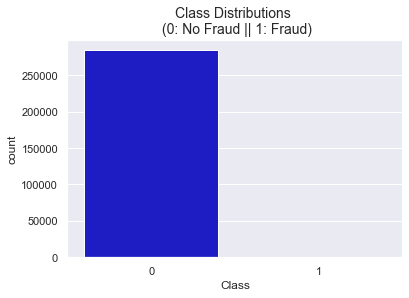

In [91]:
#Lets try and visulaise this
colors = ["#0101DF", "#DF0101"]
sns.countplot("Class",data=df,palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [92]:
#By seeing the distributions we can have an idea how skewed are 
# these features, we can also see further distributions of the other features.

<function matplotlib.pyplot.show(*args, **kw)>

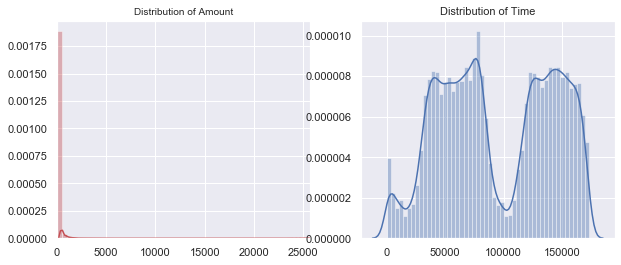

In [93]:
fig,ax = plt.subplots(1,2,figsize = (10,4))
sns.distplot(df["Amount"].values,ax= ax[0],color='r')
ax[0].set_title("Distribution of Amount",fontsize = 10)
ax[0].set_xlim([min(df["Amount"].values), max(df["Amount"].values)])
sns.distplot(df["Time"].values,ax=ax[1],color = "b")
ax[1].set_title("Distribution of Time",fontsize = 11)
plt.show

## Scaling and Distributing
##### In this phase of our kernel, we will first scale the columns comprise of Time and Amount . Time and amount should be scaled as the other columns. On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.

In [94]:
from sklearn.preprocessing import StandardScaler,RobustScaler
#RobustScaler is less prone to Outliers

std_scaler = StandardScaler()
rob_scaler = RobustScaler()
df["Amount"] = rob_scaler.fit_transform(df["Amount"].values.reshape(-1,1))
df['Time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))

## Creating subsample of the data

What is a sub-Sample
In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions.

Why do we create a sub-Sample?

In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! Using the original dataframe will cause the following issues:
Overfitting: Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs.
Wrong Correlations: Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features.

Splitting the Data (Original DataFrame)
Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

In [97]:
X = df.drop(["Class"],axis=1)
y=df["Class"]

In [98]:
#cross validation approach with shuffle
sss = StratifiedKFold(n_splits=5,random_state=None,shuffle=False)

In [99]:
#obrain train and test index and create original train and test data
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain,original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain,original_ytest = y.iloc[train_index], y.iloc[test_index]

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [100]:
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

### Random Under sampling

In this phase of the project we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

#### Steps:

The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount for each label)
Once we determine how many instances are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 492 cases of non-fraud transactions.
After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.

Note: 
The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

In [101]:
df= df.sample(frac=1)  # random shuffle of the data sample

In [102]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
265445,1.412442,0.101966,0.937434,-0.159005,-0.886422,1.151837,-0.228694,1.063587,-0.152316,-0.239933,...,-0.295153,-0.641137,0.006461,0.065042,-0.316541,0.145252,0.249477,0.100474,-0.188360,0
247663,1.238946,-1.160304,0.533649,-1.780044,-1.578629,3.519172,3.000498,0.552279,0.694815,-0.035491,...,0.162340,0.870454,0.135636,0.629453,0.104201,-0.143159,0.220830,0.144978,0.000000,0
58801,-0.974158,1.096277,-0.874698,1.252904,-0.875646,-1.751356,-0.621355,-0.799560,0.035555,2.454703,...,-0.042914,0.242602,-0.074076,0.815444,0.420487,0.014186,0.061379,0.039026,0.537972,0
260069,1.359755,2.061561,-0.027118,-1.054395,0.415572,-0.119705,-1.211355,0.207028,-0.353965,0.492066,...,-0.284861,-0.671133,0.337283,0.055150,-0.288729,0.194282,-0.068648,-0.059122,-0.279746,0
137310,-0.267601,1.414509,-1.374434,1.110627,-1.292125,-1.924839,0.155440,-1.663920,0.190239,-1.269849,...,-0.206737,-0.079484,0.005699,0.004305,0.258025,-0.193665,0.073010,0.020769,0.006847,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75624,-0.813823,-0.627192,0.800623,1.762330,1.016055,0.425359,-0.372116,0.266529,0.055894,-0.899774,...,-0.166644,-0.523586,-0.048409,0.055308,-0.141745,0.407967,0.069960,0.098346,-0.279746,0
199717,0.806248,0.079183,0.461127,-0.631050,-0.435863,1.402023,-0.910403,1.519057,-0.423819,-0.231498,...,0.282098,1.000961,-0.232803,-0.458234,-0.465296,-0.183331,0.022564,-0.008546,0.097813,0
51948,-1.044681,-0.742751,0.475642,1.266253,0.514362,-0.310715,1.112718,1.079678,0.026520,0.349170,...,-0.042117,0.150953,-0.327419,-0.975982,0.344032,-0.246064,0.108742,0.060568,2.479983,0
114713,-0.446846,0.805970,-0.161875,0.143460,2.477756,-0.052364,0.033522,0.377515,-0.107749,-0.668614,...,-0.009925,-0.591723,-0.262446,-0.477042,0.414212,-0.071309,-0.051107,0.056701,2.921959,0


In [103]:
#creating subsample
fraud = df[df["Class"] == 1]
non_fraud = df[df["Class"]==0][:492]
normal_distributed_df = pd.concat([fraud, non_fraud])
new_df = normal_distributed_df.sample(frac=1,random_state = 42)

In [104]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


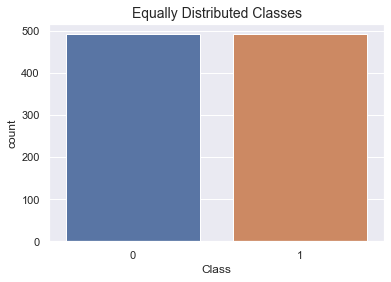

In [22]:
sns.countplot(new_df["Class"])
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

#### Correlation Matrices
Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.

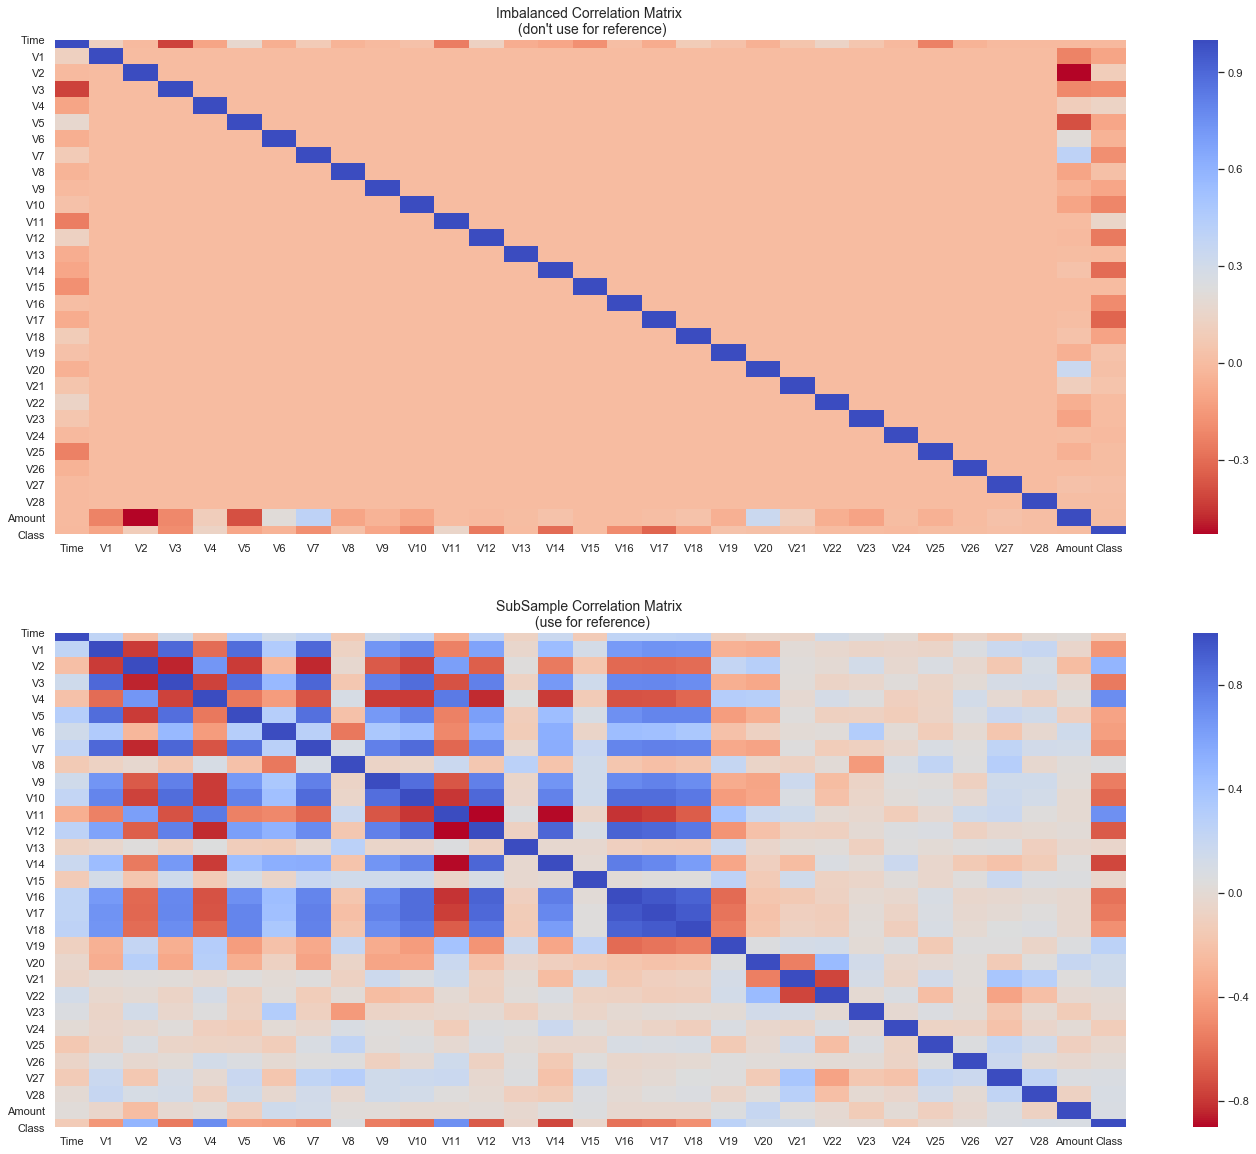

In [105]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))
# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

##### Explanation:

Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.

Note: We have to make sure we use the subsample in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes. This occurs due to the high class imbalance in the original dataframe.

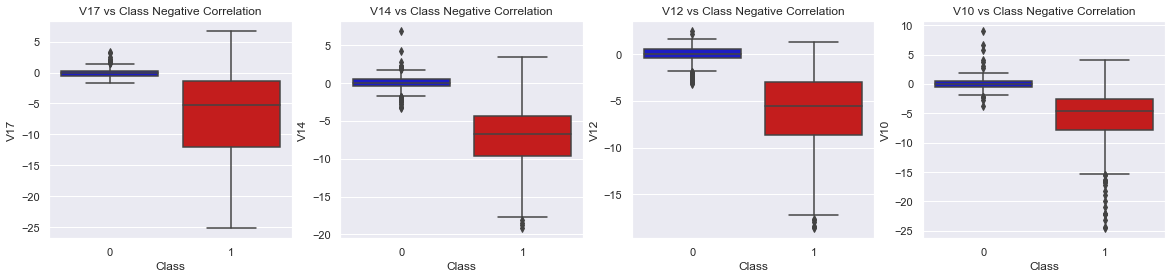

In [106]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')
plt.show()

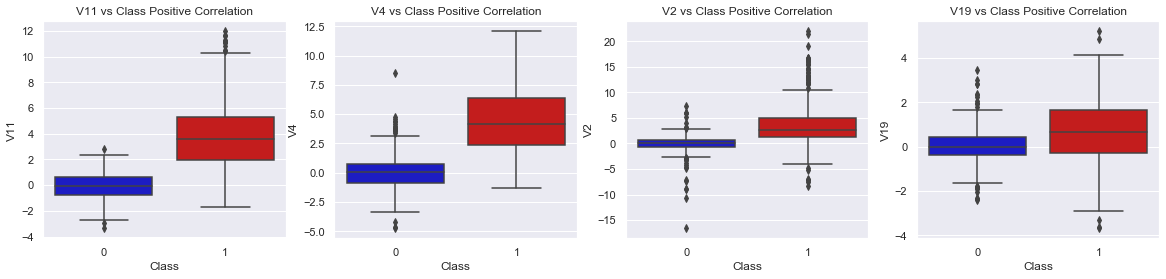

In [107]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')
plt.show()

### Anomaly Detection:
Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. 
This will have a positive impact on the accuracy of our models.
    
    
#### Interquartile Range Method:¶
Interquartile Range (IQR): We calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.

Boxplots: Besides easily seeing the 25th and 75th percentiles (both end of the squares) it is also easy to see extreme outliers (points beyond the lower and higher extreme).

#### The Tradeoff: 
The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. Why? because we might run the risk of information loss which will cause our models to have a lower accuracy. You can play with this threshold and see how it affects the accuracy of our classification models.

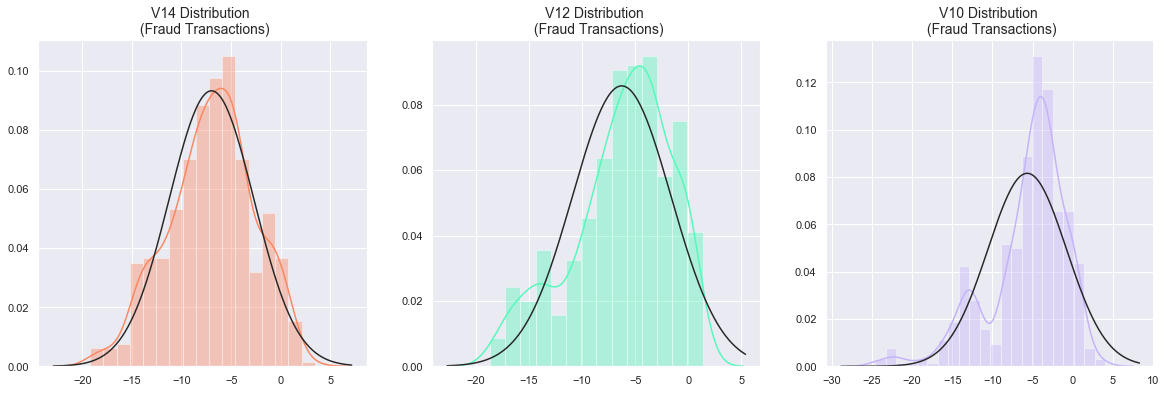

In [108]:
from scipy.stats import norm
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))
v14_fraud_dist = new_df[new_df["Class"]==1]["V14"].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df[new_df["Class"]==1]["V12"].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v10_fraud_dist = new_df[new_df["Class"]==1]["V10"].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [109]:
def outliers_detection(df,column,column_name):
    values = df[df["Class"]==1][column_name].values
    q25, q75 = np.percentile(values, 25), np.percentile(values, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    iqr = q75 - q25
    print('iqr: {}'.format(iqr))
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Column {0} Cut Off: {1}'.format(column_name,cut_off))
    print('Lower: {}'.format(lower))
    print('Upper: {}'.format(upper))
    outliers = [x for x in values if x < lower or x > upper]
    print('Feature {0} Outliers for Fraud Cases: {1}'.format(column_name,len(outliers)))
    print('Column {} outliers:{}'.format(column_name,outliers))
    df = df.drop(df[(column>upper) | (column<lower)].index)
    return df
    print('----' * 44)
    #q25, q75 = np.percentile(values, 25), np.percentile(values, 75)

In [110]:
new_df_1=outliers_detection(new_df,new_df["V14"],"V14")
new_df_2=outliers_detection(new_df_1,new_df_1["V12"],"V12")
new_df=outliers_detection(new_df_2,new_df_2["V10"],"V10")
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Column V14 Cut Off: 8.114853173228278
Lower: -17.807576138200663
Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
Column V14 outliers:[-18.4937733551053, -19.2143254902614, -18.8220867423816, -18.049997689859396]
Quartile 25: -8.67303320439115 | Quartile 75: -2.893030568676315
iqr: 5.780002635714835
Column V12 Cut Off: 8.670003953572252
Lower: -17.3430371579634
Upper: 5.776973384895937
Feature V12 Outliers for Fraud Cases: 4
Column V12 outliers:[-18.683714633344298, -18.047596570821604, -18.553697009645802, -18.4311310279993]
Quartile 25: -7.466658535821848 | Quartile 75: -2.5118611381562523
iqr: 4.954797397665596
Column V10 Cut Off: 7.4321960964983935
Lower: -14.89885463232024
Upper: 4.920334958342141
Feature V10 Outliers for Fraud Cases: 27
Column V10 outliers:[-15.563791338730098, -15.346098846877501, -22.1870885620007, -20.949191554361104, -18.2711681738888, -23.2282548357516, 

In [111]:
def create_boxplot(df,column,column_name):
    colors = ['#O3F9C7', '#g9c5b3']
    ax=sns.boxplot(x="Class", y=column_name, data=df)
    ax.set_title('Distribution \n (Fraud Transactions)', fontsize=10)
    ax.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),arrowprops=dict(facecolor='black'),fontsize=14)
    return ax

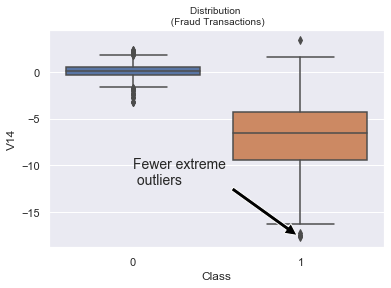

In [112]:
# to compare the amount of outliers removed
create_boxplot(new_df,new_df["V14"],"V14")

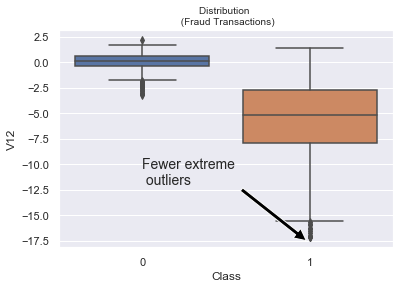

In [113]:
create_boxplot(new_df,new_df["V12"],"V12")

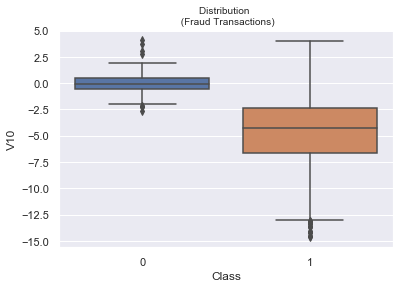

In [114]:
create_boxplot(new_df,new_df["V10"],"V10")

In [33]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

In [115]:
import matplotlib.patches as mpatches

In [35]:
#X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
#X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
#X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
""" f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])
plt.show() """

" f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))\n# labels = ['No Fraud', 'Fraud']\nf.suptitle('Clusters using Dimensionality Reduction', fontsize=14)\nblue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')\nred_patch = mpatches.Patch(color='#AF0000', label='Fraud')\n\n# t-SNE scatter plot\nax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)\nax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)\nax1.set_title('t-SNE', fontsize=14)\nax1.grid(True)\nax1.legend(handles=[blue_patch, red_patch])\n\n# PCA scatter plot\nax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)\nax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)\nax2.set_title('PCA', fontsize=14)\nax2.grid(True)\nax2.legend(handles=[blue_patch, red_patch])\n\n# TruncatedSVD scat

### Modelling for Undersampling

In this section we will train four types of classifiers and decide which classifier will be more effective in detecting fraud transactions. Before we have to split our data into training and testing sets and separate the features from the labels.

In [116]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
276671,1.525081,-0.420145,0.688424,1.139459,-0.417697,0.411314,-0.705142,0.768749,0.014854,-0.603065,...,-0.258190,-0.850306,-0.222086,0.050017,0.448636,0.386711,-0.134671,-0.081775,-0.294977,0
154694,0.164423,-2.877176,4.569649,-9.553069,4.441079,-3.653961,-1.877981,-3.514353,1.547608,-2.503304,...,1.272896,1.300268,-0.003950,-0.360848,-0.597526,-0.390901,0.592197,-0.241010,4.540488,1
118436,-0.415575,-0.618902,0.545430,2.336316,0.687458,-0.362396,0.302596,-0.132561,0.343381,0.540006,...,0.049847,0.237069,-0.103759,0.035007,-0.169094,-0.429150,-0.010302,0.088379,-0.307273,0
77387,-0.795713,-2.335655,2.225380,-3.379450,2.178538,-3.568264,0.316814,-1.734948,1.449139,-1.980033,...,0.785540,0.297412,0.308536,-0.598416,-0.121850,-0.491018,0.701606,0.206966,5.899113,1
192687,0.736904,1.522080,-0.519429,-2.581685,0.774741,0.206722,-1.431020,0.757011,-0.444418,0.997921,...,0.019649,-0.211678,-0.247452,-0.279472,0.239646,-0.508398,-0.015551,0.041881,3.551596,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250761,1.268532,-0.512349,4.827060,-7.973939,7.334059,0.367704,-2.055129,-2.935856,1.431008,-4.544722,...,0.535620,-0.459496,-0.009364,-1.140436,-0.006445,0.527970,0.558881,0.126517,-0.296653,1
150665,-0.020171,-6.750509,5.367416,-10.054635,9.064478,-7.968118,-2.263798,-10.317566,4.237666,-5.324109,...,1.909032,-0.348740,0.425001,0.674909,-0.784208,-0.247422,1.159581,0.197818,2.622092,1
103617,-0.549188,1.049601,-0.010115,0.510645,0.489723,0.096573,0.836770,-0.322942,0.419802,0.129964,...,-0.125704,-0.256093,0.314123,-0.664063,-0.168891,0.205671,0.037360,0.005837,-0.279746,0
234632,1.121106,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,...,0.209086,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,-0.285195,1


In [117]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [118]:
from sklearn.model_selection import train_test_split
# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
# Turn the values into arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [120]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RadomForestClassifier": RandomForestClassifier(),
    "XG-Boost": XGBClassifier()
}

In [69]:
for key,classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    train_score=cross_val_score(classifier,X_train,y_train,cv=5)
    print ("Classifier:{} has a score of {}".format(classifier.__class__.__name__,round(train_score.mean(),2)))

Classifier:LogisticRegression has a score of 0.93
Classifier:KNeighborsClassifier has a score of 0.93

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


Classifier:SVC has a score of 0.92


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Classifier:DecisionTreeClassifier has a score of 0.89
Classifier:RandomForestClassifier has a score of 0.93
[18:21:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:21:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Summary:

Logistic Regression and XGB classifier is more accurate than the other four classifiers in most cases. (We will further these two)
GridSearchCV is used to determine the paremeters that gives the best predictive score for the classifiers.
Logistic Regression has the best Receiving Operating Characteristic score (ROC), meaning that LogisticRegression pretty accurately separates fraud and non-fraud transactions.

In [124]:
#Hyper paramet tuning
#Logistic Regression:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.941280 using {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [126]:
#fit the model with best parameter combination
log_reg = grid_result.best_estimator_

In [127]:
#K nearest neighbours
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
algorithm= ['auto', 'ball_tree', 'kd_tree', 'brute']
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric,algorithm=algorithm)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result_svc = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result_svc.cv_results_['mean_test_score']
stds = grid_result_svc.cv_results_['std_test_score']
params = grid_result_svc.cv_results_['params']
svc=grid_result_svc.best_estimator_

Best: 0.941280 using {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [128]:
#SVC
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=SVC(), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.937147 using {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [129]:
svc = grid_result.best_estimator_

In [130]:
#randomForest
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.935734 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.925847 (0.029389) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.933616 (0.030115) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.935734 (0.027876) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.929379 (0.027218) with: {'max_features': 'log2', 'n_estimators': 10}
0.932910 (0.028157) with: {'max_features': 'log2', 'n_estimators': 100}
0.935381 (0.030100) with: {'max_features': 'log2', 'n_estimators': 1000}


In [ ]:
#XGBoost 
max_depth = [3,10]
learning_rate = [0.05,0.01]
colsample_bytree = [0.3,0.7]
n_estimators= [500, 1000]
subsample = [0.8,1]
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth,colsample_bytree=colsample_bytree)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [131]:
#Lets plot the curve for logistic regression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator1,X, y, ylim=None, cv=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    # First Estimator
    if ylim is not None:
        plt.ylim(*ylim)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="#ff9124")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",label="Cross-validation score")
    plt.title("Logistic Regression Learning Curve", fontsize=14)
    plt.xlabel('Training size (m)')
    plt.ylabel('Score')
    plt.grid(True)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

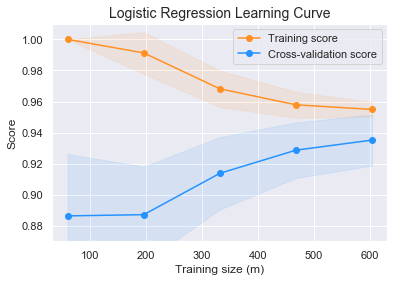

In [132]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg,X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

Learning Curves:
The wider the gap between the training score and the cross validation score, the more likely your model is overfitting (high variance).

If the score is low in both training and cross-validation sets this is an indication that our model is underfitting (high bias)

Logistic Regression Classifier shows the best score in both training and cross-validating sets.

In [133]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

In [134]:
from sklearn.metrics import roc_auc_score
print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))

Logistic Regression:  0.9742438928456038


In [135]:
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))

Support Vector Classifier:  0.9748971019989605


In [136]:
#ROC curve
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)

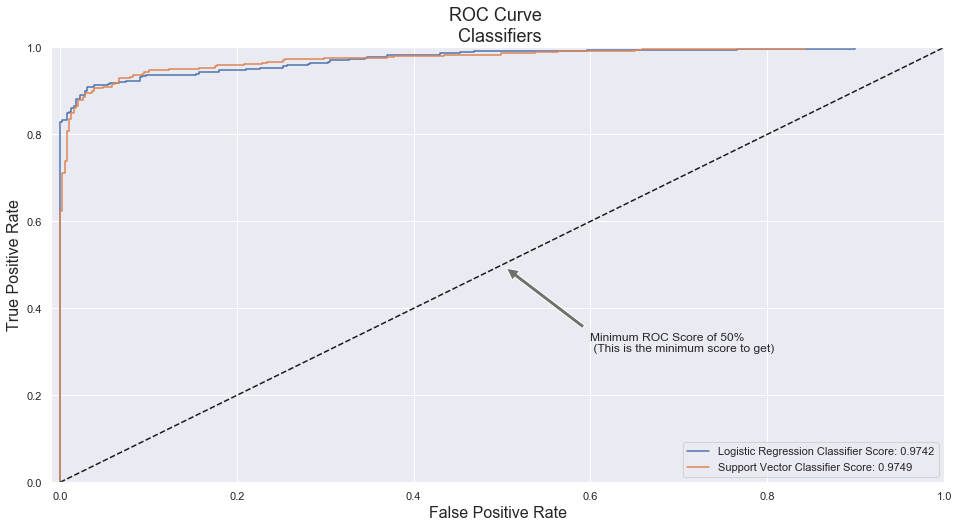

In [137]:
def graph_roc_curve(log_fpr, log_tpr,svc_fpr, svc_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve(log_fpr, log_tpr,svc_fpr, svc_tpr,)
plt.show()

In [141]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

In [139]:
#underanpling during cross validation
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

In [140]:
for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

Train: [ 53129  53157  53412 ... 284804 284805 284806] Test: [    0     1     2 ... 56969 56970 56971]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 53129  53157  53412 ... 113921 113922 113923]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113924 113925 113926 ... 170882 170883 170884]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170885 170886 170887 ... 227847 227848 227849]
Train: [     0      1      2 ... 227847 227848 227849] Test: [224142 224628 226537 ... 284804 284805 284806]


In [142]:
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values
#d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [0.9421045, 0.987079]}
#final_df = pd.DataFrame(data=d)

In [144]:
undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

In [ ]:
undersample_y_score = log_reg.decision_function(original_Xtest)
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

In [ ]:
from sklearn.metrics import average_precision_score
undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))
# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []
# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)
# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

In [ ]:
y_score = best_est.decision_function(original_Xtest)
average_precision = average_precision_score(original_ytest, y_score)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

In [ ]:
fig = plt.figure(figsize=(12,6))
precision, recall, _ = precision_recall_curve(original_ytest, y_score)
plt.step(recall, precision, color='r', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='#F59B00')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

### Confusion Matrix:
Positive/Negative: Type of Class (label) ["No", "Yes"] True/False: Correctly or Incorrectly classified by the model.


True Negatives (Top-Left Square): This is the number of correctly classifications of the "No" (No Fraud Detected) class.


False Negatives (Top-Right Square): This is the number of incorrectly classifications of the "No"(No Fraud Detected) class.


False Positives (Bottom-Left Square): This is the number of incorrectly classifications of the "Yes" (Fraud Detected) class


True Positives (Bottom-Right Square): This is the number of correctly classifications of the "Yes" (Fraud Detected) class.

Summary:
Random UnderSampling: We will evaluate the final performance of the classification models in the random undersampling subset. Keep in mind that this is not the data from the original dataframe.
Classification Models: The models that performed the best were logistic regression and support vector classifier (SVM)

In [ ]:
from sklearn.metrics import confusion_matrix
# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))

sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

In [ ]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score
# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)
# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)
d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)
# Note how high is accuracy score it can be misleading! 

In [145]:
final_df

,Technique,Score
0,Random UnderSampling,0.942105
1,Oversampling (SMOTE),0.987079


Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels (more no fraud than fraud transactions). Nevertheless, I still have to state that sometimes the neural network on the oversampled dataset predicts less correct fraud transactions than our model using the undersample dataset. However, remember that the removal of outliers was implemented only on the random undersample dataset and not on the oversampled one. Also, in our undersample data our model is unable to detect for a large number of cases non fraud transactions correctly and instead, misclassifies those non fraud transactions as fraud cases. Imagine that people that were making regular purchases got their card blocked due to the reason that our model classified that transaction as a fraud transaction, this will be a huge disadvantage for the financial institution. The number of customer complaints and customer disatisfaction will increase. The next step of this analysis will be to do an outlier removal on our oversample dataset and see if our accuracy in the test set improves.